In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

In [13]:
df = pd.read_csv('insuranceFraud.csv')

In [14]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [15]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported'],
      dtype='object')

In [16]:
data=df.replace('?',np.nan)
data.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,10/17/2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,6/27/2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,9/6/2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,5/25/1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,6/6/2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [17]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [18]:
fraud = data['fraud_reported'].value_counts()

In [19]:
fraud.index

Index(['N', 'Y'], dtype='object')

In [20]:
fraud.values

array([753, 247], dtype=int64)

In [21]:
px.pie(data_frame = fraud, names = fraud.index, values = fraud.values)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hovertemplate': 'index=%{label}<br>value=%{value}<extra></extra>',
              'labels': array(['N', 'Y'], dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie',
              'values': array([753, 247], dtype=int64)}],
    'layout': {'legend': {'tracegroupgap': 0}, 'margin': {'t': 60}, 'template': '...'}
})

Observation: 25% claims were detected as Fraud while 75% claims are not Fraud.

In [ ]:
px.histogram(data, x="auto_make", color="fraud_reported", barmode='group')

Observation:  lookslike expensive cars are most involved in Frauds Like Mercedes, Audi, BMW, Ford while Accura, Nissan, Toyota are less involved in Fraud.

In [ ]:
px.histogram(data, x="insured_relationship", color="fraud_reported", barmode='group')

Observation: Most of the Frauds are with Other-relative, not-in-family and wife 

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

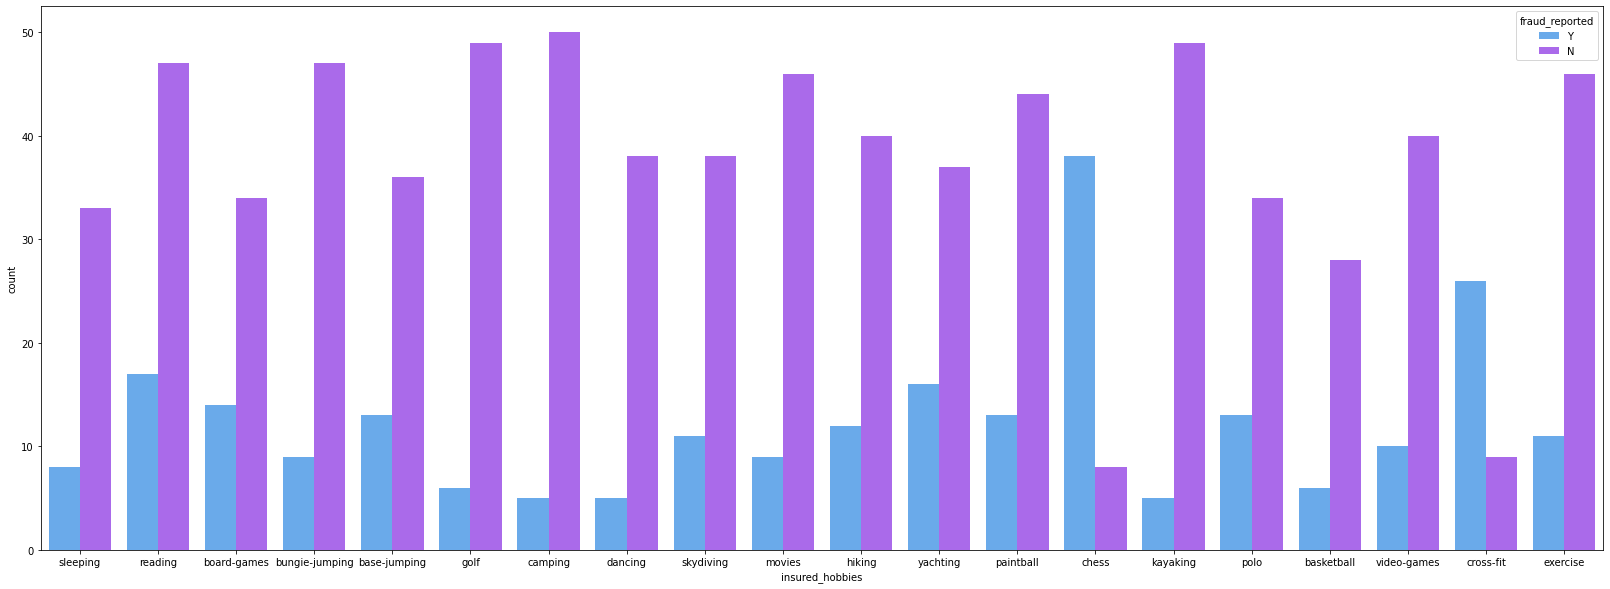

In [ ]:
plt.subplots(figsize = (28,10))
sns.countplot(data = data, x = 'insured_hobbies', hue = 'fraud_reported', palette = 'cool')

Observation: Those who play Chess are most likely to be involved in Fraud whereas camping,Kayaking, dancing, basketball are less involved in Frauds.

In [ ]:
px.histogram(data, x="age", color="fraud_reported", barmode='group')

Observation: between 30 to 43 age group most of the frauds were done and from 50 and above age group involved less in fraud.

C:\Users\Aniket Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='incident_state', ylabel='count'>

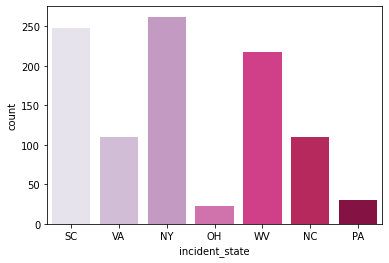

In [ ]:
sns.countplot(data['incident_state'], palette = 'PuRd')

Observation: Most of the incident happened in NY and SC. while less incident in OH and PA state.

In [ ]:
px.histogram(data, x = 'insured_education_level')

Observation: High School and JD education level Customers are more as compared to other education.

C:\Users\Aniket Pc\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'craft-repair'),
  Text(1, 0, 'machine-op-inspct'),
  Text(2, 0, 'sales'),
  Text(3, 0, 'armed-forces'),
  Text(4, 0, 'tech-support'),
  Text(5, 0, 'prof-specialty'),
  Text(6, 0, 'other-service'),
  Text(7, 0, 'priv-house-serv'),
  Text(8, 0, 'exec-managerial'),
  Text(9, 0, 'protective-serv'),
  Text(10, 0, 'transport-moving'),
  Text(11, 0, 'handlers-cleaners'),
  Text(12, 0, 'adm-clerical'),
  Text(13, 0, 'farming-fishing')])

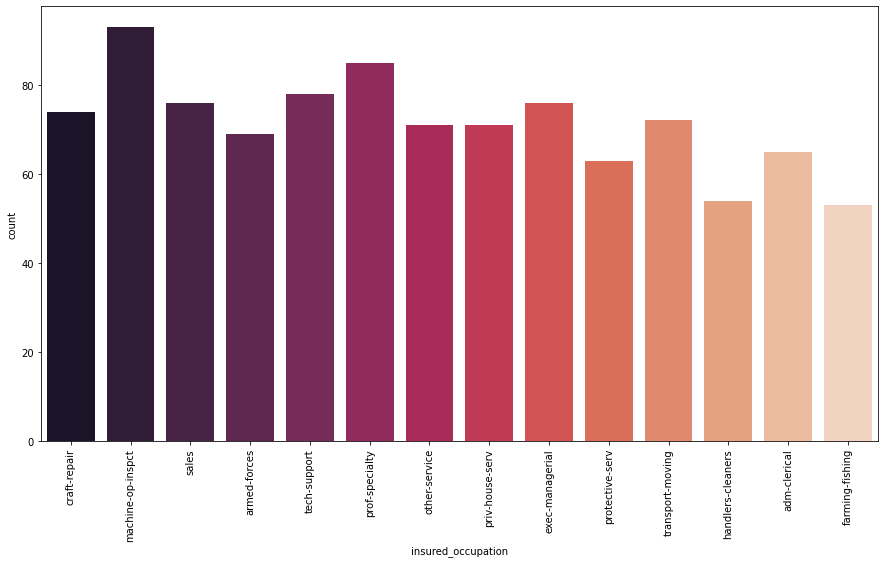

In [ ]:
plt.subplots(figsize = (15,8))
sns.countplot(data['insured_occupation'], palette='rocket')
plt.xticks(rotation = 90)

Observation: Machine-op-inspct most of the customers have this Occupation.

In [ ]:
df.loc[df['insured_sex'] == 'FEMALE','insured_sex'] = 0
df.loc[df['insured_sex'] == 'MALE','insured_sex'] = 1

df['insured_sex'] = df['insured_sex'].astype(int)

In [ ]:
df.loc[df['fraud_reported'] == 'N','fraud_reported'] = 0
df.loc[df['fraud_reported'] == 'Y','fraud_reported'] = 1

df['fraud_reported'] = df['fraud_reported'].astype(int)

I have converted these 2 features from object to int.

In [ ]:
gender = df.groupby('insured_sex')['fraud_reported'].sum()

In [ ]:
gender_value = gender.values

In [ ]:
label_gender = data.insured_sex.value_counts().index

In [ ]:
px.pie(data_frame=gender,names = label_gender, values = gender_value)

Observation: frauds by Females are slightly higher as compared to Men.

In [ ]:
incident = data['incident_type'].value_counts()
incident

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64

In [ ]:
label_incident = incident.index
label_incident

Index(['Multi-vehicle Collision', 'Single Vehicle Collision', 'Vehicle Theft',
       'Parked Car'],
      dtype='object')

In [ ]:
incident_values = incident.values
incident_values

array([419, 403,  94,  84], dtype=int64)

In [ ]:
px.pie(data_frame=incident,names=label_incident,values=incident_values)

Observation: looks like Collision type incident happens most as compare to park and theft.

In [ ]:
fig = px.scatter(data, x = 'total_claim_amount', y = 'policy_annual_premium', color = 'insured_sex',
                marginal_x = 'box', marginal_y = 'histogram')
fig.show()